In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Success rate % \n 20 day average')

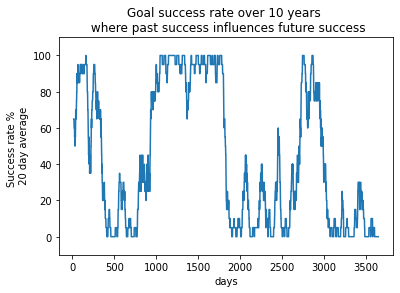

In [14]:
n = 365 * 10
m = 20

df = pd.DataFrame(index=range(n))

for i in range(n):
    if i <= m+1:
        df.at[i,'p_success'] = 0.5
    else:
        past_success_count = 0
        for j in range(1,m+1):
            past_success_count = past_success_count + df["success"][i-j]
        past_success = past_success_count / m
        p_success = max(1/m, past_success)
        p_success = min(1-(1/m), p_success)
        df.at[i,'p_success'] = p_success
        df.at[i,'past_success'] = past_success
    random = np.random.uniform()
    df.at[i,'success'] = 1 if (random < df["p_success"][i]) else 0

plt.plot(df['success'].rolling(m).mean().multiply(100))

ca = plt.gca()
ca.set_ylim([-10,110])
ca.set_title("Goal success rate over 10 years \n where past success influences future success")
ca.set_xlabel('days')
ca.set_ylabel('Success rate % \n '+ str(m) +' day average')

Text(0, 0.5, 'Success rate % \n 20 day average')

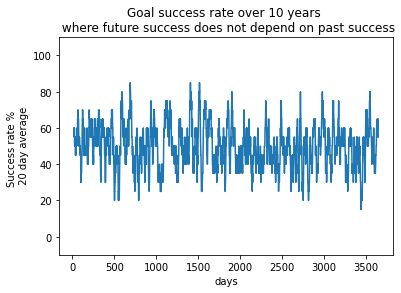

In [13]:
n = 365 * 10
m = 20

df = pd.DataFrame(index=range(n))

for i in range(n):
    random = np.random.uniform()
    df.at[i,'success'] = 1 if (random < 0.5) else 0

plt.plot(df['success'].rolling(m).mean().multiply(100))

ca = plt.gca()
ca.set_ylim([-10,110])
ca.set_title("Goal success rate over 10 years \n where future success does not depend on past success")
ca.set_xlabel('days')
ca.set_ylabel('Success rate % \n '+str(m)+' day average')

Text(0, 0.5, 'Success rate % \n 20 day average')

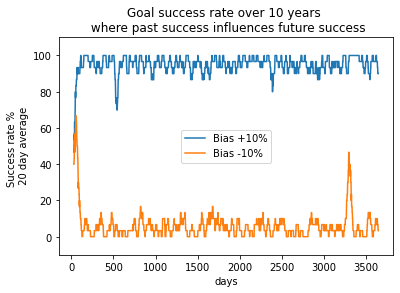

In [15]:
n = 365 * 10
m = 20
bias = 0.1

df = pd.DataFrame(index=range(n))

for i in range(n):
    if i <= m+1:
        df.at[i,'p_success'] = 0.5
    else:
        past_success_count = 0
        for j in range(1,m+1):
            past_success_count = past_success_count + df["success"][i-j]
        past_success = past_success_count / m
        p_success = max(1/m, past_success + bias)
        p_success = min(1-(1/m), p_success)
        df.at[i,'p_success'] = p_success
        df.at[i,'past_success'] = past_success
    random = np.random.uniform()
    df.at[i,'success'] = 1 if (random < df["p_success"][i]) else 0

#ax = plt.plot(df['success'].rolling(30).mean().multiply(100))
ax = pd.DataFrame(df['success'].rolling(30).mean().multiply(100)).plot()


df2 = pd.DataFrame(index=range(n))

for i in range(n):
    if i <= m+1:
        df2.at[i,'p_success'] = 0.5
    else:
        past_success_count = 0
        for j in range(1,m+1):
            past_success_count = past_success_count + df2["success"][i-j]
        past_success = past_success_count / m
        p_success = max(1/m, past_success - bias)
        p_success = min(1-(1/m), p_success)
        df2.at[i,'p_success'] = p_success
        df2.at[i,'past_success'] = past_success
    random = np.random.uniform()
    df2.at[i,'success'] = 1 if (random < df2["p_success"][i]) else 0

pd.DataFrame(df2['success'].rolling(30).mean().multiply(100)).plot(ax=ax)


L=plt.legend()
L.get_texts()[0].set_text('Bias +'+ str(int(bias*100)) + "%")
L.get_texts()[1].set_text('Bias -'+ str(int(bias*100)) + "%")

ca = plt.gca()
ca.set_ylim([-10,110])
ca.set_title("Goal success rate over 10 years \n where past success influences future success")
ca.set_xlabel('days')
ca.set_ylabel('Success rate % \n '+str(m)+' day average')